# LAB | Central Limit Theorem and Normality Tests


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

# Set random seed for reproducibility
np.random.seed(42)

# Setting plot style
plt.style.use('seaborn-v0_8')

## Challenge 1: Basic Central Limit Theorem Demonstration

In this challenge, you'll explore the fundamental concept of the Central Limit Theorem
by generating samples from different distributions and observing how their sample means
approach a normal distribution as sample size increases.

# Instructions
Instructions:
1. We'll create a non-normal distribution (exponential distribution)
2. Draw samples of different sizes and calculate their means
3. Observe how the distribution of sample means approaches normal distribution
4. Complete the code below to create histograms for sample means


In [2]:
# Set parameters
population_size = 10000
sample_sizes = [1, 5, 30, 100]  # Increasing sample sizes
n_samples = 1000  # Number of samples to draw for each sample size

# Create a non-normal population (exponential distribution with lambda=0.5)
population = np.random.exponential(scale=2, size=population_size)

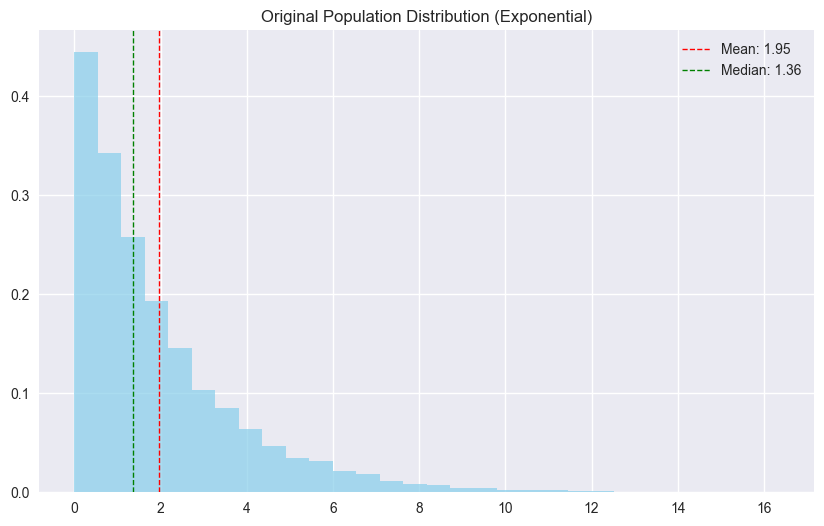

Population statistics:
Mean: 1.9550
Median: 1.3566
Variance: 3.7975
Skewness: 1.9190
Kurtosis: 5.1151



In [3]:
# Plot the original population distribution
plt.figure(figsize=(10, 6))
plt.hist(population, bins=30, alpha=0.7, color='skyblue', density=True)
plt.title('Original Population Distribution (Exponential)')
plt.axvline(np.mean(population), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(population):.2f}')
plt.axvline(np.median(population), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(population):.2f}')
plt.legend()
plt.show()

print(f"Population statistics:")
print(f"Mean: {np.mean(population):.4f}")
print(f"Median: {np.median(population):.4f}")
print(f"Variance: {np.var(population):.4f}")
print(f"Skewness: {stats.skew(population):.4f}")
print(f"Kurtosis: {stats.kurtosis(population):.4f}\n")

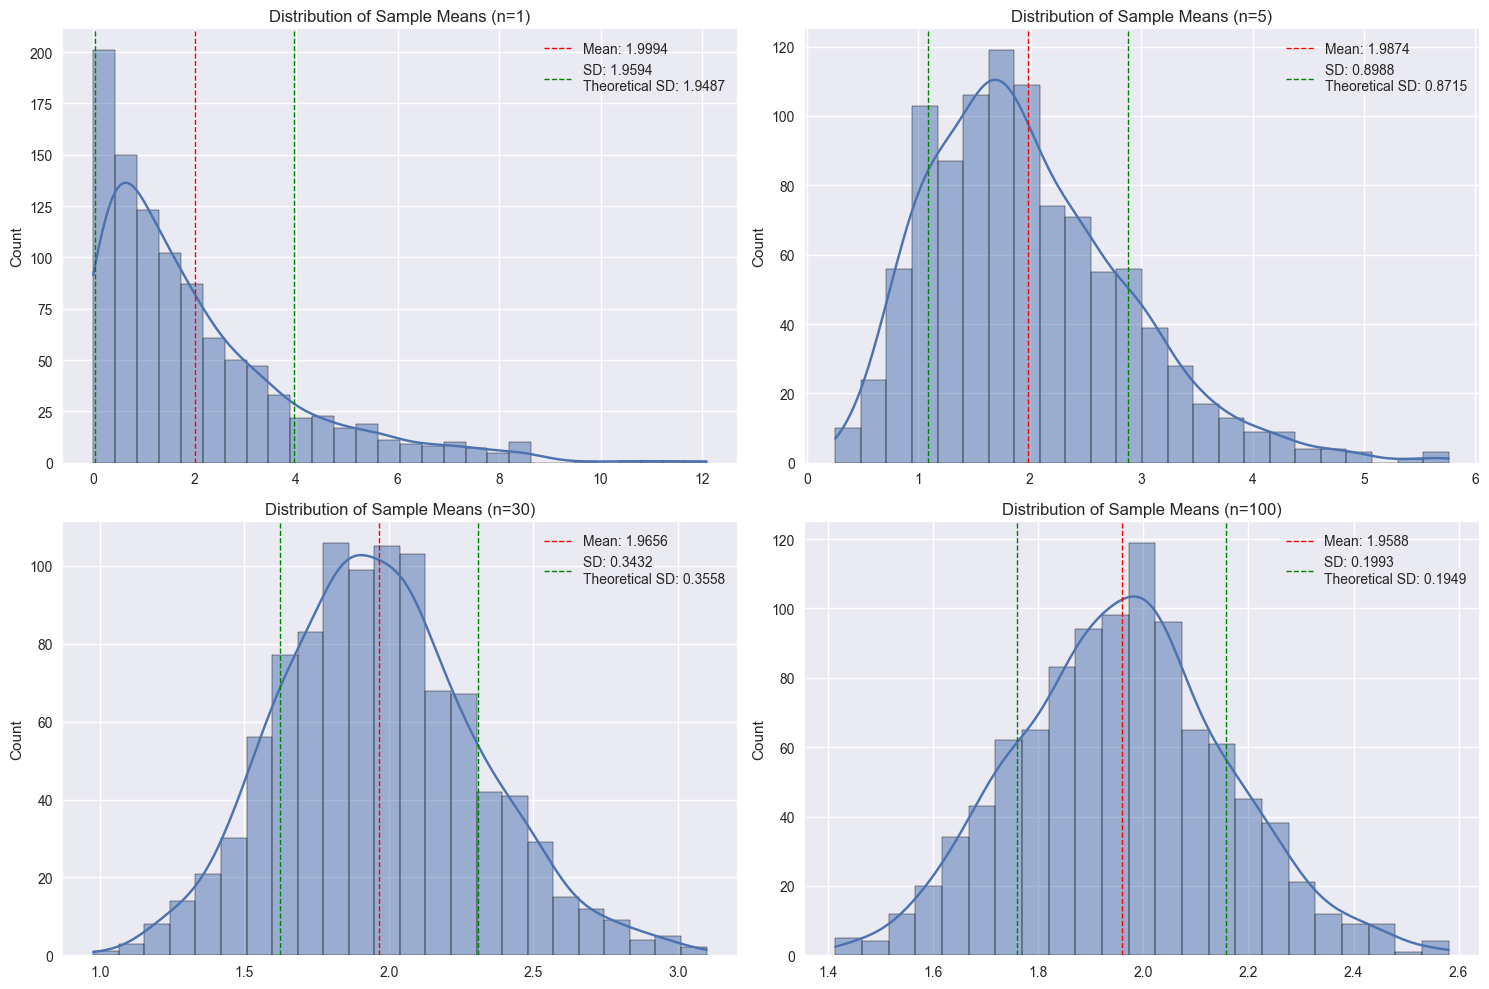

In [4]:
# Show how sample means approach normal distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, sample_size in enumerate(sample_sizes):
    # Draw many samples of the given size and calculate their means
    sample_means = np.array([np.mean(np.random.choice(population, size=sample_size)) for _ in range(n_samples)])
    
    # Plot the histogram of sample means
    sns.histplot(sample_means, kde=True, ax=axes[i])
    
    # Calculate statistics for the sample means
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means)
    
    # According to CLT, the standard deviation of sample means should be population_std / sqrt(sample_size)
    theoretical_std = np.std(population) / np.sqrt(sample_size)
    
    # Display the statistics
    axes[i].set_title(f'Distribution of Sample Means (n={sample_size})')
    axes[i].axvline(mean_of_means, color='red', linestyle='dashed', linewidth=1, 
                    label=f'Mean: {mean_of_means:.4f}')
    axes[i].axvline(mean_of_means + std_of_means, color='green', linestyle='dashed', linewidth=1,
                   label=f'SD: {std_of_means:.4f}\nTheoretical SD: {theoretical_std:.4f}')
    axes[i].axvline(mean_of_means - std_of_means, color='green', linestyle='dashed', linewidth=1)
    axes[i].legend()

plt.tight_layout()
plt.show()

Your Tasks:
1. Explain what happens to the distribution of sample means as sample size increases
2. Compare the observed standard deviation of sample means with the theoretical value
3. What is the theoretical SD formula according to the CLT?
4. How does the skewness of the distribution of sample means change with sample size?

In [5]:
# TODO
# Your code here 

"""
1. As the sample size increases the distrubution of the means resembles a normal distribution more closely. 
The higher the sample size the more normal the distribution

2. The higher the sample size the closer is the standard deviation to the theoretical Standard Deviation

3. The formula for the theoretical Standard Deviation is:
    std_theoretical = Standard Deviation / square_root(number of samples)
    theoretical_std = np.std(population) / np.sqrt(sample_size)

4. The higher the sample size the less skewed the distribution of sample means

    
"""

'\n1. As the sample size increases the distrubution of the means resembles a normal distribution more closely. \nThe higher the sample size the more normal the distribution\n\n2. The higher the sample size the closer is the standard deviation to the theoretical Standard Deviation\n\n3. The formula for the theoretical Standard Deviation is:\n    std_theoretical = Standard Deviation / square_root(number of samples)\n    theoretical_std = np.std(population) / np.sqrt(sample_size)\n\n4. The higher the sample size the less skewed the distribution of sample means\n\n    \n'

## Challenge 2: CLT with Real-World Data


Now let's apply the Central Limit Theorem to a real-world dataset.
We'll use the famous Iris dataset.


In [6]:
# Load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [7]:
# Preview of the Iris dataset:
display(iris_df.head())
# Summary statistics:
print(iris_df.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


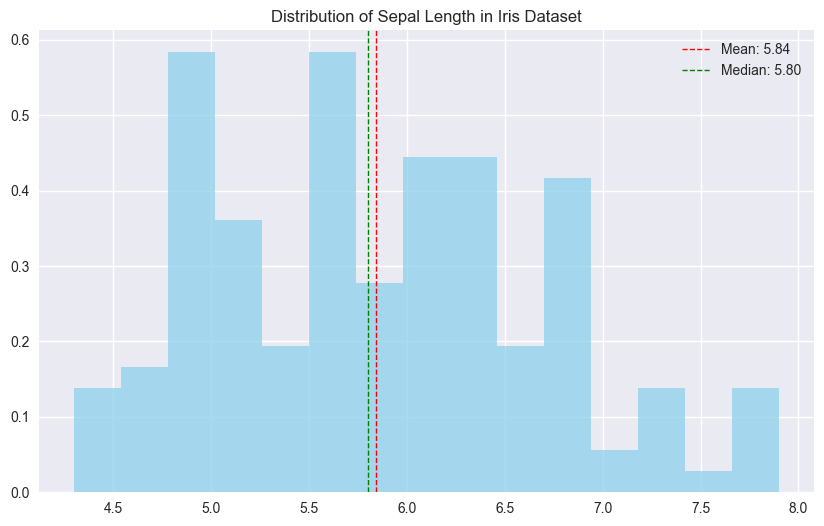

In [8]:
# Let's focus on sepal length for this exercise
sepal_length = iris_df['sepal length (cm)'].values

# Plot the original distribution
plt.figure(figsize=(10, 6))
plt.hist(sepal_length, bins=15, alpha=0.7, color='skyblue', density=True)
plt.title('Distribution of Sepal Length in Iris Dataset')
plt.axvline(np.mean(sepal_length), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(sepal_length):.2f}')
plt.axvline(np.median(sepal_length), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(sepal_length):.2f}')
plt.legend()
plt.show()

Your Tasks:
1. Complete the following code to draw samples of sepal length and compute their means
2. Create histograms for the distribution of sample means with sample sizes of 5, 15, and 30
3. Calculate and compare the standard deviation of the original data vs. the standard deviation of sample means
4. Test if the original data is normally distributed (using a method of your choice)

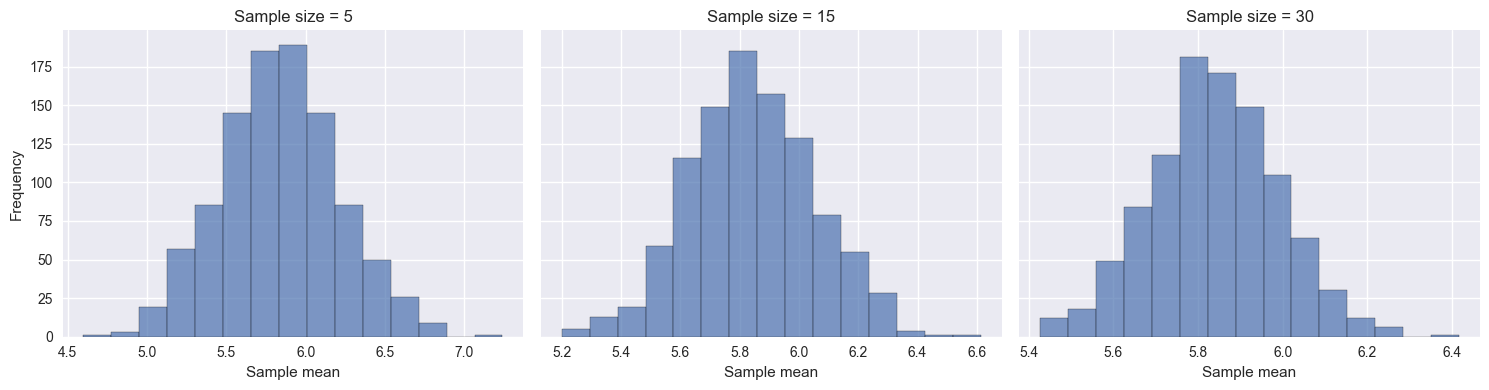

In [9]:
# TODO
# draw samples of sepal length and compute their means


iris_samples_5 = [np.mean(np.random.choice(sepal_length, 5)) for _ in range(1000)] # collecting 5 samples of 1000 observations each
iris_samples_15 = [np.mean(np.random.choice(sepal_length, 15)) for _ in range(1000)] # collecting 15 samples of 1000 observations each
iris_samples_30 = [np.mean(np.random.choice(sepal_length, 30)) for _ in range(1000)] # collecting 30 samples of 1000 observations each

# Create histograms for the distribution of sample means with sample sizes of 5, 15, and 30
# Plot histograms side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

axes[0].hist(iris_samples_5, bins=15, edgecolor='black', alpha=0.7)
axes[0].set_title("Sample size = 5")
axes[0].set_xlabel("Sample mean")
axes[0].set_ylabel("Frequency")

axes[1].hist(iris_samples_15, bins=15, edgecolor='black', alpha=0.7)
axes[1].set_title("Sample size = 15")
axes[1].set_xlabel("Sample mean")

axes[2].hist(iris_samples_30, bins=15, edgecolor='black', alpha=0.7)
axes[2].set_title("Sample size = 30")
axes[2].set_xlabel("Sample mean")

plt.tight_layout()
plt.show()

In [10]:
# 4. Test if the original data is normally distributed (using a method of your choice)
standardized_saleprice = (iris_df['sepal length (cm)'] - iris_df['sepal length (cm)'].mean()) / iris_df['sepal length (cm)'].std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_saleprice, 'norm')
ks_test_statistic, ks_p_value

# print the test result
if ks_p_value < 0.05:
    print('The test results indicate that the distribution of sepal length is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of sepal length is not significantly different from a normal distribution.')

The test results indicate that the distribution of sepal length is not significantly different from a normal distribution.


## Challenge 3: CLT with Different Sample Statistics


The Central Limit Theorem applies not only to sample means but also to other
statistics like medians, variances, and proportions. Let's explore this concept.


In [37]:
# Load Boston Housing dataset
# from sklearn.datasets import load_boston
# from sklearn.datasets import fetch_openml 
# # Fetch Boston Housing dataset from OpenML
# boston = fetch_openml(name="boston", version=1, as_frame=True)
# boston_df = boston.frame
# # boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
# boston_df['MEDV'] = boston.target

# # Display of the Boston Housing dataset:
# boston_df.head()
import pandas as pd
from sklearn.datasets import fetch_openml  # <-- make sure this is included

# Fetch Boston Housing dataset from OpenML
boston = fetch_openml(name="boston", version=1, as_frame=True)
boston_df = boston.frame
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [31]:
#Summary statistics for housing prices (MEDV):
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [35]:
# Let's focus on housing prices (MEDV)
housing_prices = boston_df['MEDV'].values

# Create a binary variable: 1 if price > median, 0 otherwise
median_price = np.median(housing_prices)
housing_binary = (housing_prices > median_price).astype(int)

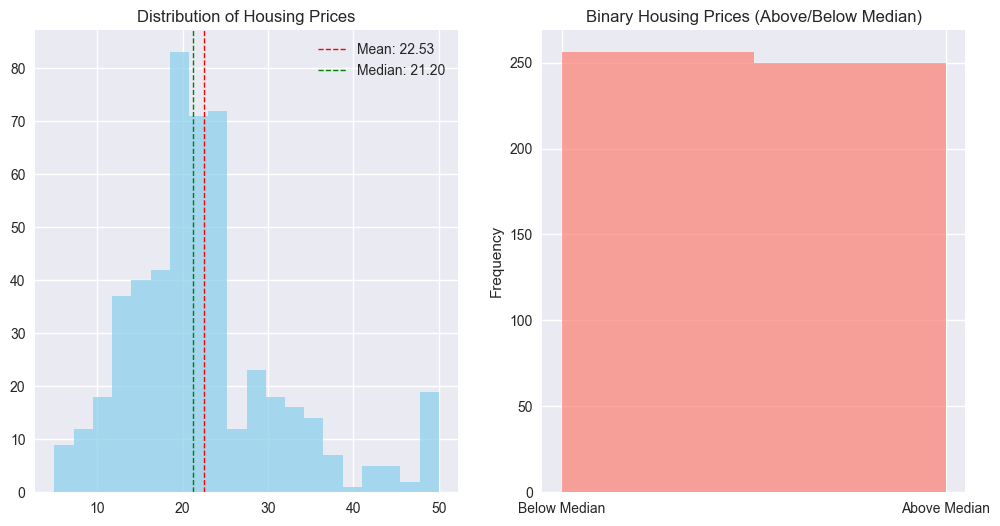

In [36]:
# Plot the original distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(housing_prices, bins=20, alpha=0.7, color='skyblue')
plt.title('Distribution of Housing Prices')
plt.axvline(np.mean(housing_prices), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(housing_prices):.2f}')
plt.axvline(np.median(housing_prices), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.median(housing_prices):.2f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(housing_binary, bins=2, alpha=0.7, color='salmon')
plt.title('Binary Housing Prices (Above/Below Median)')
plt.xticks([0, 1], ['Below Median', 'Above Median'])
plt.ylabel('Frequency')
plt.show()

Your Tasks:
1. Implement sampling to examine the CLT's application to three different statistics:
   a) Sample means
   b) Sample medians
   c) Sample proportions (of houses above median price)
2. For each statistic, draw 1000 samples of size 30 and plot the distribution of the sample statistics
3. Compare the shapes of these three distributions
4. Discuss whether the CLT applies equally well to all three statistics.


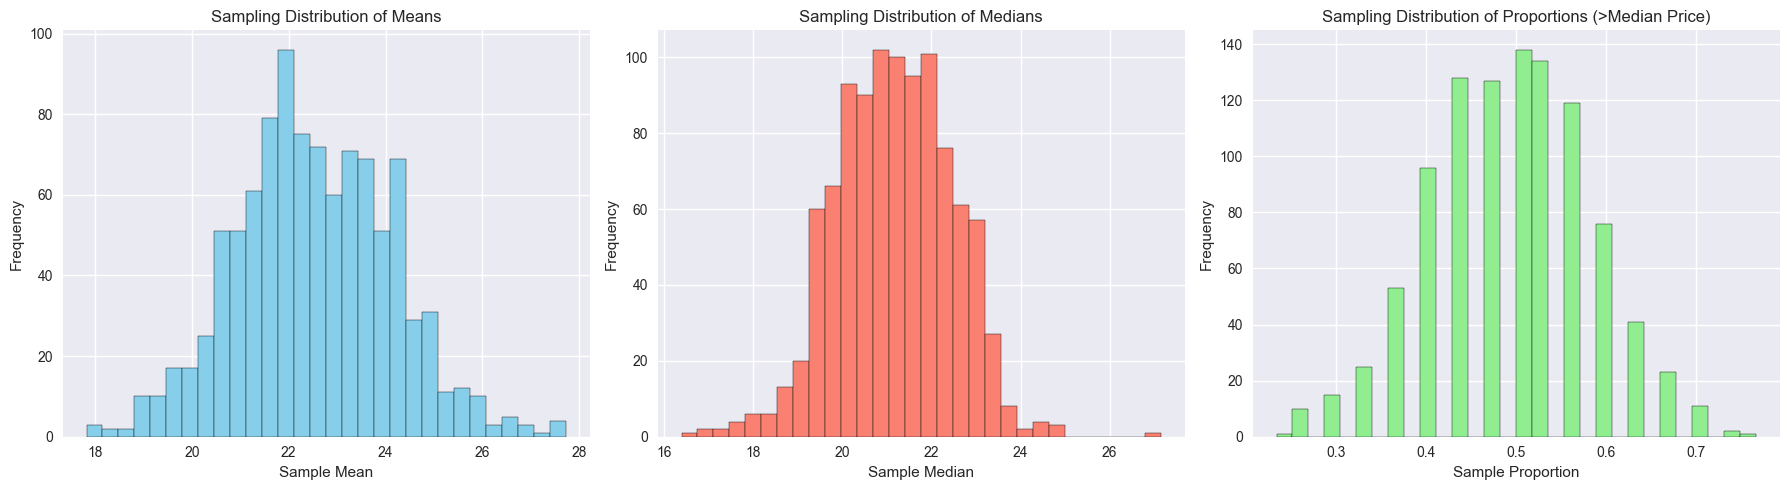

Means: mean = 22.536283333333333 , std = 1.60531075487652
Medians: mean = 21.180199999999996 , std = 1.2909813941339356
Proportions: mean = 0.4930333333333333 , std = 0.08887768748866799


In [ ]:
# TODO
# Your code here - implement sampling and plotting for different statistics

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Step 1: Load Boston Housing dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
boston_df = boston.frame

# Step 2: Define parameters for sampling
n_samples = 1000   # Number of samples
sample_size = 30   # Sample size

# Step 3: Initialize lists to store statistics
sample_means = []
sample_medians = []
sample_proportions = []

# Median house price for proportion calculation
median_price = boston_df['MEDV'].median()

# Step 4: Sampling loop
for _ in range(n_samples):
    sample = boston_df['MEDV'].sample(sample_size, replace=True)
    
    # a) Sample mean
    sample_means.append(sample.mean())
    
    # b) Sample median
    sample_medians.append(sample.median())
    
    # c) Sample proportion of houses above median price
    sample_proportions.append((sample > median_price).mean())

# Step 5: Convert lists to arrays 
sample_means = np.array(sample_means)
sample_medians = np.array(sample_medians)
sample_proportions = np.array(sample_proportions)

# Step 6: Plot histograms
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black')
plt.title('Sampling Distribution of Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
plt.hist(sample_medians, bins=30, color='salmon', edgecolor='black')
plt.title('Sampling Distribution of Medians')
plt.xlabel('Sample Median')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
plt.hist(sample_proportions, bins=30, color='lightgreen', edgecolor='black')
plt.title('Sampling Distribution of Proportions (>Median Price)')
plt.xlabel('Sample Proportion')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 7: Display summary statistics
print("Means: mean =", np.mean(sample_means), ", std =", np.std(sample_means))
print("Medians: mean =", np.mean(sample_medians), ", std =", np.std(sample_medians))
print("Proportions: mean =", np.mean(sample_proportions), ", std =", np.std(sample_proportions))


## Challenge 4: Testing for Normality - Visual Methods

Before applying tests that assume normality, it's important to check if data
follows a normal distribution. Let's explore visual methods first.


In [17]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['MedHouseVal'] = california.target

print("Preview of the California Housing dataset:")
display(california_df.head())

Preview of the California Housing dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
print("\nSummary statistics for median income:")
print(california_df['MedInc'].describe())


Summary statistics for median income:
count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64


In [19]:
# We'll focus on median income for this challenge
median_income = california_df['MedInc'].values


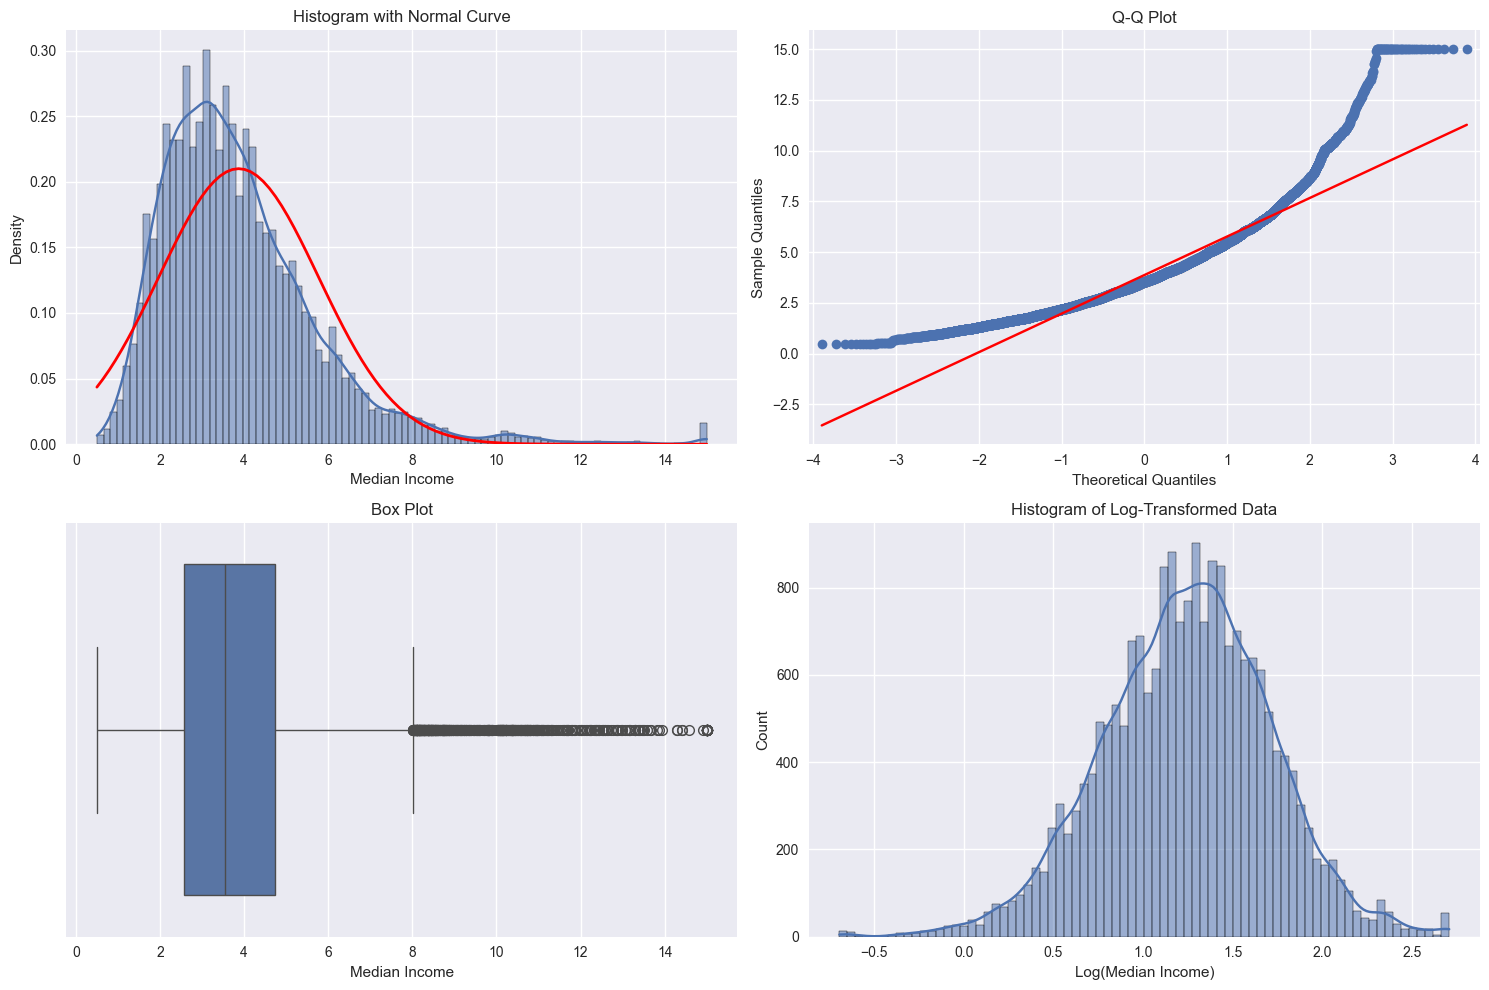

In [20]:
# Create some visualizations for normality assessment
plt.figure(figsize=(15, 10))

# Histogram with normal curve overlay
plt.subplot(2, 2, 1)
sns.histplot(median_income, kde=True, stat="density")
# Add theoretical normal curve
x = np.linspace(min(median_income), max(median_income), 100)
y = stats.norm.pdf(x, np.mean(median_income), np.std(median_income))
plt.plot(x, y, 'r-', linewidth=2)
plt.title('Histogram with Normal Curve')
plt.xlabel('Median Income')

# Q-Q plot
plt.subplot(2, 2, 2)
qqplot(median_income, line='s', ax=plt.gca())
plt.title('Q-Q Plot')

# Box plot
plt.subplot(2, 2, 3)
sns.boxplot(x=median_income)
plt.title('Box Plot')
plt.xlabel('Median Income')

# Log-transformed histogram
plt.subplot(2, 2, 4)
sns.histplot(np.log(median_income), kde=True)
plt.title('Histogram of Log-Transformed Data')
plt.xlabel('Log(Median Income)')

plt.tight_layout()
plt.show()

Your Tasks:
1. Interpret the four plots above. What do they tell you about the normality of the data?
2. Create at least two additional visualizations to assess normality
3. Discuss whether a transformation might help make the data more normal
4. Apply your chosen transformation and re-assess normality
5. When would it be important to have normally distributed data in statistical analysis?

After using Visualizations to assess normality:

6. Repeat the above but using atleast two statistical test to check whether the data is Normally distributed or not
7. Make sure you apply the statistical test on both the original and transformed data.

In [21]:
# Your code here - additional normality visualizations and transformations
"""
1. Interpret the four plots above. What do they tell you about the normality of the data?
    the Histogram shows that the data is skewed and has a right tail
    The QQ-plot also shows that both sides are more skewed than a normal distribution would be (points are far away from the line)
    The Boxpßlot shows, that there are many outliers in the median income
    The log transformed data resembles a normal distribution more closely (although not perfectly)


3. Discuss whether a transformation might help make the data more normal
    The logarithmic transformation already showed that a transformation would make the data appear more normal
    However, the Sharpio-Wilk Test and the Kologorov-Smirnov Test both showed that the distribution is still not normal (as done in excercise 7)

5. When would it be important to have normally distributed data in statistical analysis?
    It's important to have normally distributed data in statistical analysis if you apply functions or machine learning models that assume normally distributed data
    Normality matters mainly for statistical inference and certain model assumptions
    
"""


"\n1. Interpret the four plots above. What do they tell you about the normality of the data?\n    the Histogram shows that the data is skewed and has a right tail\n    The QQ-plot also shows that both sides are more skewed than a normal distribution would be (points are far away from the line)\n    The Boxpßlot shows, that there are many outliers in the median income\n    The log transformed data resembles a normal distribution more closely (although not perfectly)\n\n\n3. Discuss whether a transformation might help make the data more normal\n    The logarithmic transformation already showed that a transformation would make the data appear more normal\n    However, the Sharpio-Wilk Test and the Kologorov-Smirnov Test both showed that the distribution is still not normal (as done in excercise 7)\n\n5. When would it be important to have normally distributed data in statistical analysis?\n    It's important to have normally distributed data in statistical analysis if you apply functions o

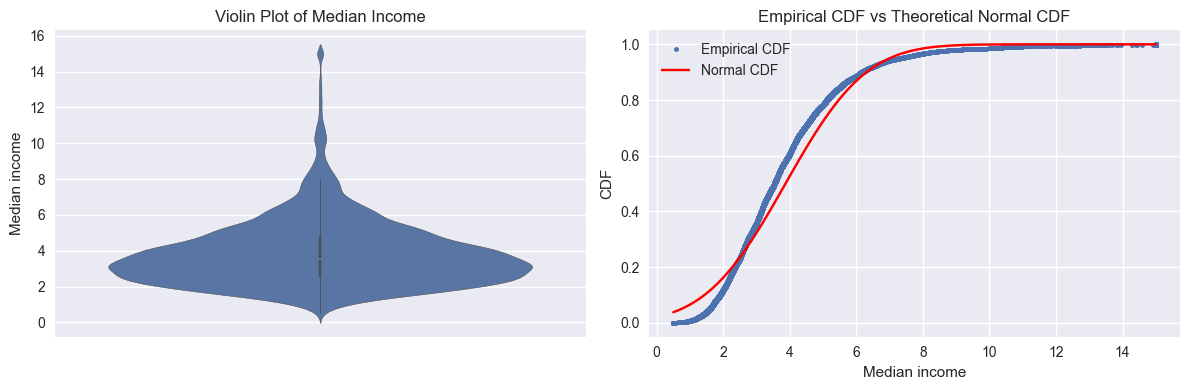

In [26]:
# 2. Create at least two additional visualizations to assess normality
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm

# Violin plot
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Violin plot
sns.violinplot(data=median_income, ax=axes[0])
axes[0].set_xticks([])
axes[0].set_ylabel("Median income")
axes[0].set_title("Violin Plot of Median Income")

ecdf = ECDF(median_income)

# Theoretical normal params
mu, sigma = np.mean(median_income), np.std(median_income, ddof=1)
# Range for CDF
x = np.linspace(min(median_income), max(median_income), 100)
theoretical_cdf = norm.cdf(x, loc=mu, scale=sigma)


# Empirical vs Theoretical CDF
axes[1].plot(ecdf.x, ecdf.y, marker='.', linestyle='none', label="Empirical CDF")
axes[1].plot(x, theoretical_cdf, 'r-', label="Normal CDF")
axes[1].set_xlabel("Median income")
axes[1].set_ylabel("CDF")
axes[1].set_title("Empirical CDF vs Theoretical Normal CDF")
axes[1].legend()

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'BoxCox Transformed median_income')

<Figure size 1000x500 with 0 Axes>

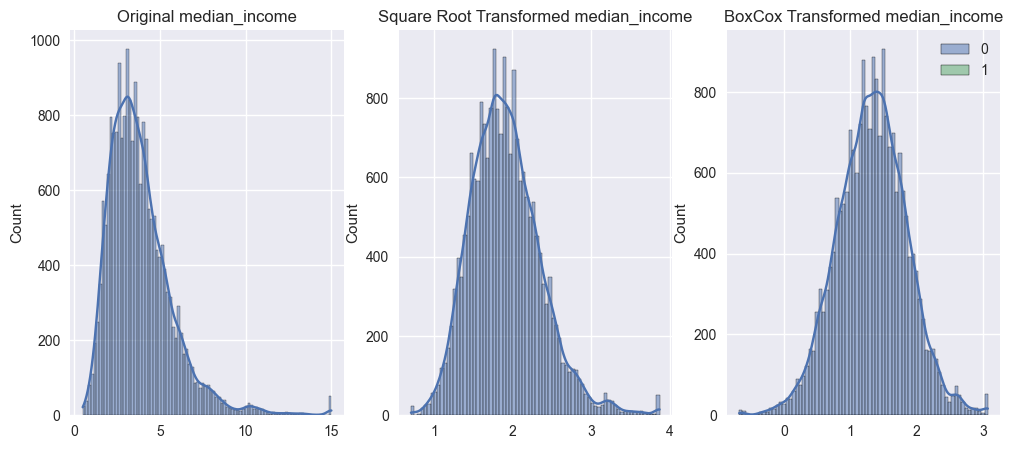

In [29]:
# 4. Apply your chosen transformation and re-assess normality
from scipy.stats import boxcox

# Applying Square Root transformation to '1stFlrSF'
median_income_sqrt = np.sqrt(median_income)

median_income_sqrt_BoxCox = boxcox(median_income)


# Plotting the transformed distributions
plt.figure(figsize=(10,5))

# Create subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Original median_income
sns.histplot(median_income, kde=True, ax=axes[0])
axes[0].set_title('Original median_income')

# Square Root transformed median_income
sns.histplot(median_income_sqrt, kde=True, ax=axes[1])
axes[1].set_title('Square Root Transformed median_income')

# boxcox transformed median_income
sns.histplot(median_income_sqrt_BoxCox, kde=True, ax=axes[2])
axes[2].set_title('BoxCox Transformed median_income')
## The data is still skewed - but less than the original Data

In [ ]:
# 6.  Repeat the above but using atleast two statistical test to check whether the data is Normally distributed or not
# Conducting the Kolmogorov-Smirnov test on the log-transformed and standardized 'SalePrice'
shapiro_test_statistic, shapiro_p_value = stats.shapiro(median_income)

shapiro_test_statistic, shapiro_p_value
# print the test result
if shapiro_p_value < 0.05:
    print('shapiro: The test results indicate that the distribution of median_income is significantly different from a normal distribution.')
else:
    print('shapiro: The test results indicate that the distribution of median_income is not significantly different from a normal distribution.')


# Conducting the Kolmogorov-Smirnov test for normality on '1stFlrSF'
standardized_1stFlrSF = (median_income - median_income.mean()) / median_income.std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_1stFlrSF, 'norm')

ks_test_statistic, ks_p_value

# print the test result
if ks_p_value < 0.05:
    print('Kolmogorov-Smirnov: The test results indicate that the distribution of median_income is significantly different from a normal distribution.')
else:
    print('Kolmogorov-Smirnov: The test results indicate that the distribution of median_income is not significantly different from a normal distribution.')

shapiro: The test results indicate that the distribution of median_income is significantly different from a normal distribution.
Kolmogorov-Smirnov: The test results indicate that the distribution of median_income is significantly different from a normal distribution.


In [ ]:
# 7. Make sure you apply the statistical test on both the original and transformed data.



shapiro_test_statistic, shapiro_p_value = stats.shapiro(median_income_sqrt)

# print the test result
if shapiro_p_value < 0.05:
    print('shapiro: The test results indicate that the distribution of median_income_sqrt is significantly different from a normal distribution.')
else:
    print('shapiro: The test results indicate that the distribution of median_income_sqrt is not significantly different from a normal distribution.')


# Conducting the Kolmogorov-Smirnov test for normality on '1stFlrSF'
standardized_1stFlrSF = (median_income_sqrt - median_income_sqrt.mean()) / median_income_sqrt.std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_1stFlrSF, 'norm')

# print the test result
if ks_p_value < 0.05:
    print('Kolmogorov-Smirnov: The test results indicate that the distribution of median_income_sqrt is significantly different from a normal distribution.')
else:
    print('Kolmogorov-Smirnov: The test results indicate that the distribution of median_income_sqrt is not significantly different from a normal distribution.')




median_income_log_transformed = np.log1p(median_income)


shapiro_test_statistic, shapiro_p_value = stats.shapiro(median_income_log_transformed)

# print the test result
if shapiro_p_value < 0.05:
    print('shapiro: The test results indicate that the distribution of median_income_log_transformed is significantly different from a normal distribution.')
else:
    print('shapiro: The test results indicate that the distribution of median_income_log_transformed is not significantly different from a normal distribution.')


# Conducting the Kolmogorov-Smirnov test for normality on '1stFlrSF'
standardized_1stFlrSF = (median_income_log_transformed - median_income_log_transformed.mean()) / median_income_log_transformed.std()
ks_test_statistic, ks_p_value = stats.kstest(standardized_1stFlrSF, 'norm')

# print the test result
if ks_p_value < 0.05:
    print('Kolmogorov-Smirnov: The test results indicate that the distribution of median_income_log_transformed is significantly different from a normal distribution.')
else:
    print('Kolmogorov-Smirnov: The test results indicate that the distribution of median_income_log_transformed is not significantly different from a normal distribution.')

    

shapiro: The test results indicate that the distribution of median_income_sqrt is significantly different from a normal distribution.
Kolmogorov-Smirnov: The test results indicate that the distribution of median_income_sqrt is significantly different from a normal distribution.
shapiro: The test results indicate that the distribution of median_income_log_transformed is significantly different from a normal distribution.
Kolmogorov-Smirnov: The test results indicate that the distribution of median_income_log_transformed is significantly different from a normal distribution.


c:\Users\Friedrich\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)
